# Guide on FAR, FRR and EER

FAR - False Acceptance Rate

FRR - False Rejection Rate

EER - Error Equal Rate

## Computing and understanding the scenarios

In the context of NEC's system, their scores range from 0000 (low similarity) to 9999 (high similarity).

A threshold is used to decide whether a match is genuine or impostor:

Genuine match: Score ≥ threshold.

Impostor match: Score < threshold.

To start, we will need the following:

- Genuine scores (from the same user matches)

- Imposter scores (from the different user matches)

- Threshold, this is to determine if it is a match or not

To compute FAR, which is the fraction of imposter scores that is incorrectly classified as genuine.

$$ FAR = \frac{Number of impostor scores \geq threshold}{Total number of imposter scores}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Replace with your genuine and impostor scores
genuine_scores = np.random.randint(8000, 9999, size=500)  # Example genuine scores
impostor_scores = np.random.randint(0000, 7999, size=500)  # Example impostor scores

# Initialize thresholds
thresholds = np.arange(0000, 10000, 1)

# Calculate FAR and FRR
FAR = []
FRR = []

for threshold in thresholds:
    far = np.sum(impostor_scores >= threshold) / len(impostor_scores)
    frr = np.sum(genuine_scores < threshold) / len(genuine_scores)
    FAR.append(far)
    FRR.append(frr)

# Convert to arrays for plotting
FAR = np.array(FAR)
FRR = np.array(FRR)


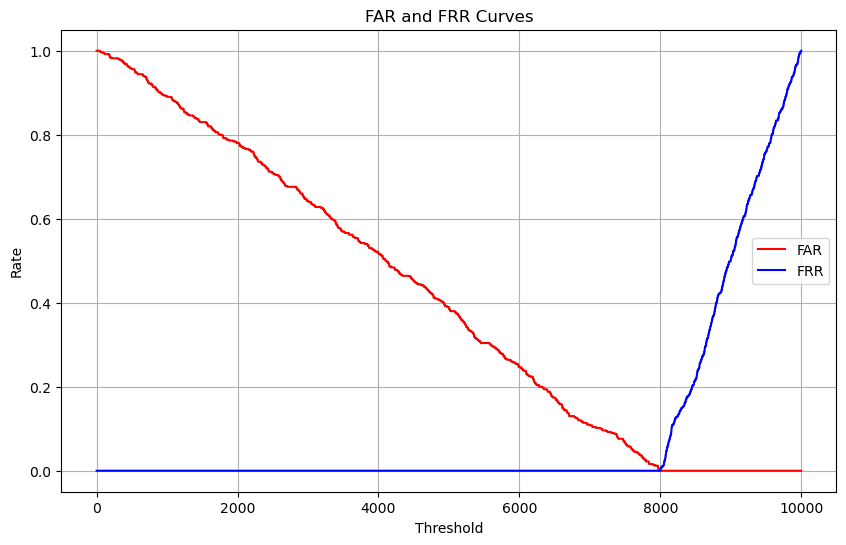

EER: 0.0000 at Threshold: 7983


In [2]:
# Plot FAR and FRR curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, FAR, label="FAR", color="red")
plt.plot(thresholds, FRR, label="FRR", color="blue")
plt.title("FAR and FRR Curves")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()
# Find the threshold where FAR ≈ FRR
eer_threshold = thresholds[np.argmin(np.abs(FAR - FRR))]
eer = FAR[np.argmin(np.abs(FAR - FRR))]

print(f"EER: {eer:.4f} at Threshold: {eer_threshold}")
